# Run the simulation
Run parralell [meep](https://meep.readthedocs.io/en/latest/) simulation of the laser-written waveguide eigen mode on 8 cores with the following parameters:
- core radius of 8 um
- 18 ellipses
- each ellipse has semi-minor axis of 1 um and semi-major axis of 4 um
- the refractive index of YAG is 1.822
- the refractive index of laser-wrriten ellipses is different by -0.004
- wavelength of 795 nm
- 20 pixel per 1 um resolution

In [ ]:
! mpirun -np 8 python Simulation.py -c 8 -N 18 -a 1 -b 4 -n 1.822  -dn -0.004 -wvg 0.795 -name YAG > results.out

# Visualize the eigen mode field distribution

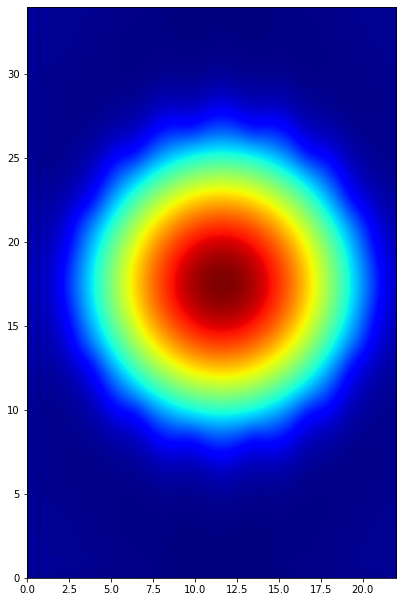

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

n = 1.822              # refractive index of material(YAG)
dn = -0.004         # refractive index modulation
a_axis = 1           # semi-minor axis of laser-printed ellipses
b_axis = 4           # semi-major axis of laser printed ellipses
core_rad = 8         # waveguide core radius
sx = 2*core_rad+4*a_axis+2  # horizontal cell size with some offset
sy = 2*core_rad+4*b_axis+2  # vertical cell size with some offset

res = 20 # used resolution
PML = 2 # used PML thickness


geometry_file = "YAG-eps-000000.00.h5"  # h5 geometry data file
field_file = "YAG-ey.h5"                # h5 field data file

   
h5 = h5py.File(field_file, "r")        # read h5 file with field data
ey_data = h5['ey']                # select field for y-polarization 


[x_down_lim, x_up_lim] = [(PML+1)*res, sx*res]
[y_down_lim, y_up_lim] = [(PML+1)*res, sy*res]
time_lim = 20

# get cross-section by selecting particular time and position along z
# and cutting the PML layers
ey_field_data = ey_data[x_down_lim:x_up_lim, y_down_lim:y_up_lim, 0, time_lim] 



max_value = np.amax(ey_field_data) 
ey_field_data = np.transpose(ey_field_data/max_value)        # In h5 x and y coordinates are exchanged, thus the array is transposed for convienent use



# visualize the result
fig, ax = plt.subplots(figsize=(18.5,10.5))  # figure size is adjusted accordingly to the size of cuts in x and y directions
ax.imshow(ey_field_data, cmap=plt.cm.jet, aspect='equal',
             interpolation='gaussian', origin="lower",
             extent=(0, sx, 0, sy)) 

# Superimpose the refractive index contrast on the field distribution 

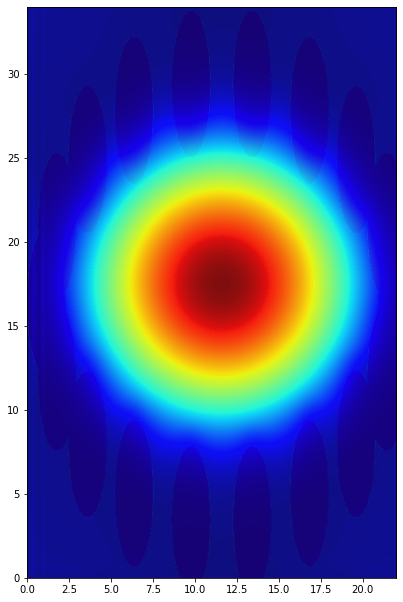

In [39]:
with h5py.File(geometry_file, "r") as file:                # read h5 file with geometry
    eps_data = np.array(file['eps'])
    
data_z=np.size(eps_data[0,0,:]) 
# define a slice position of the epsilon data along propagation axis 
z_offset = 0      

# cut the PML layers and slice along the z-axis
eps_xy = eps_data[x_down_lim:x_up_lim, y_down_lim:y_up_lim, int(data_z/2)+z_offset]  


fig, ax = plt.subplots(figsize=(18.5,10.5))

ax.imshow(ey_field_data, cmap=plt.cm.jet, aspect='equal',
             interpolation='gaussian', origin="lower",
             extent=(0, sx, 0, sy)) 
ax.imshow(np.transpose(eps_xy),cmap='Set1',
          alpha=0.1,
          vmax=n**2,vmin=(n+dn)**2,
          extent=(0, sx, 0, sy))
plt.show()